# Importing PySpark and opening files

root
 |-- order_id: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- order_status: string (nullable = true)
 |-- order_purchase_timestamp: timestamp (nullable = true)
 |-- order_approved_at: timestamp (nullable = true)
 |-- order_delivered_carrier_date: timestamp (nullable = true)
 |-- order_delivered_customer_date: timestamp (nullable = true)
 |-- order_estimated_delivery_date: timestamp (nullable = true)

root
 |-- review_id: string (nullable = true)
 |-- order_id: string (nullable = true)
 |-- review_score: integer (nullable = true)
 |-- review_comment_title: string (nullable = true)
 |-- review_comment_message: string (nullable = true)
 |-- review_creation_date: timestamp (nullable = true)
 |-- review_answer_timestamp: timestamp (nullable = true)

root
 |-- customer_id: string (nullable = true)
 |-- customer_unique_id: string (nullable = true)
 |-- customer_zip_code_prefix: integer (nullable = true)
 |-- customer_city: string (nullable = true)
 |-- customer_

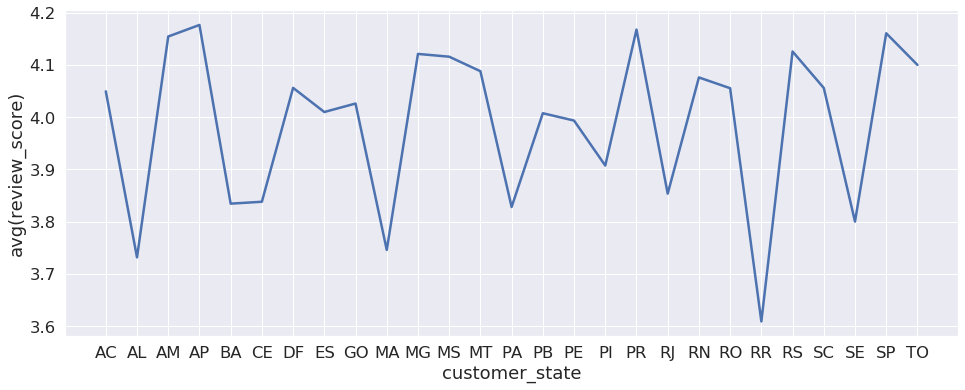

In [86]:
from pyspark.sql import SparkSession, functions as F
spark = SparkSession.builder.getOrCreate()

orders_df = spark.read \
                 .option('escape', '\"') \
                 .option('quote', '\"') \
                 .csv('./dataset/olist_orders_dataset.csv', header=True, multiLine=True, inferSchema=True)

reviews_df = spark.read \
                  .option('escape', '\"') \
                  .option('quote', '\"') \
                  .csv('./dataset/olist_order_reviews_dataset.csv', header=True, multiLine=True, inferSchema=True)

customers_df = spark.read \
                  .option('escape', '\"') \
                  .option('quote', '\"') \
                  .csv('./dataset/olist_customers_dataset.csv', header=True, multiLine=True, inferSchema=True)

orders_df.printSchema()

reviews_df.printSchema()

customers_df.printSchema()

orders_df = orders_df.select('order_id', 'customer_id')

orders_df = orders_df.join(reviews_df, orders_df.order_id == reviews_df.order_id) \
                     .join(customers_df, orders_df.customer_id == customers_df.customer_id) \
                     .select('customer_state', 'review_score')

orders_df = orders_df.groupBy('customer_state').agg(F.mean("review_score"), F.stddev("review_score")).orderBy('customer_state')
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
sns.set(font_scale=1.5)
ax_0 = sns.lineplot(x='customer_state', y='avg(review_score)', data=orders_df.toPandas(), palette="tab10", linewidth=2.5)

# Conclusion

### It's possible to conclude that there is some states where the review score average is higher or lower than other states